In [2]:
import pandas as pd
import numpy
import calendar
from time import strptime
from datetime import datetime

from matplotlib import pyplot as plt

In [4]:
df= pd.read_csv("crime_marijuana.csv")

#df['REPORTED_DATE'] = df['REPORTED_DATE'].astype('datetime64')
df['semi_year'] = df['REPORTED_DATE'].map(lambda x: x)

df['REPORTED_DATE'] = pd.to_datetime(df['REPORTED_DATE'])

df.head(20)
#df.info()
#df.shape

KeyError: 'REPORTED_DATE'

In [4]:
df = df[:1000]

In [5]:
#def divideyear()

#semi_year_df = pd.DataFrame(columns = ['first half','second half'] index = ['incident_id'])
first_half = df[df['semi_year'] < 7].copy()
second_half = df[df['semi_year'] > 6].copy()
first_half['year part'] = 'h1'
second_half['year part'] = 'h2'
completed = pd.concat([first_half,second_half], axis = 0)
                      
completed.head(2)

TypeError: '<' not supported between instances of 'str' and 'int'

In [1]:
df['year'] = df['REPORTED_DATE'].map(lambda x: x.year, 'A') if x.month < 7 else (x.year, "B"))
df['semi'] = []
df_map = df.groupby('semi_year_2').count().reset_index()
#df_map2 = df[['semi_year_2', 'INCIDENT_ID']]

plt.bar(range(df['INCIDENT_ID'].shape[0]),df['INCIDENT_ID'])# df['semi_year_2'])#, df['INCIDENT_ID'])

#type(df.iloc[0]['semi_year_2'])

SyntaxError: invalid syntax (<ipython-input-1-e3bfd6abd310>, line 1)

([<matplotlib.axis.XTick at 0x2396eae07b8>,
 <a list of 4 Text xticklabel objects>)

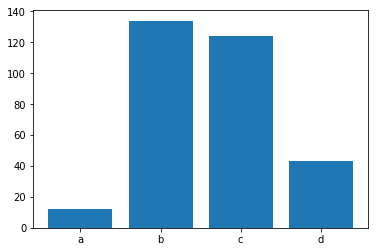

In [8]:
xs = [0,1,2,3]
ys = [12,134,124,43]
plt.bar(xs, ys)
plt.xticks([0,1,2,3], ['a','b','c','d'])

In [292]:
def weed(drugs):
    if "drug" in drugs:
        return "Drug related"
    else:
        return "Not Drug related"

df["drug_related"] = df['OFFENSE_TYPE_ID'].map(lambda x: "Drug related" if "drug" in x else "No related")


In [293]:
df.groupby(['Year',"drug_related"])['INCIDENT_ID'].count()

Year  drug_related
2013  Drug related     2935
      No related      65421
2014  Drug related     3836
      No related      80099
2015  Drug related     4341
      No related      84915
2016  Drug related     4645
      No related      86773
2017  Drug related     4462
      No related      88737
2018  Drug related     2384
      No related      42456
Name: INCIDENT_ID, dtype: int64

In [294]:
result_alternative = pd.pivot_table(df,index=['drug_related','Year'],
                                    aggfunc="count",
                                    values=['INCIDENT_ID'],
                                    margins=True)
result_alternative

INCIDENT_ID
drug_related Year             
Drug related 2013         2935
             2014         3836
             2015         4341
             2016         4645
             2017         4462
             2018         2384
No related   2013        65421
             2014        80099
             2015        84915
             2016        86773
             2017        88737
             2018        42456
All                     471004

In [295]:
Resu = result_alternative.reset_index()




In [296]:
Resu.rename(columns={'INCIDENT_ADDRESS':'Count_Crimes'}, inplace=True)
Resu.to_clipboard()

Resu['Year_2'] = Resu['Year']

Resu.head()

,drug_related,Year,INCIDENT_ID,Year_2
0,Drug related,2013,2935,2013
1,Drug related,2014,3836,2014
2,Drug related,2015,4341,2015
3,Drug related,2016,4645,2016
4,Drug related,2017,4462,2017


In [134]:
#result_alternative= result_alternative.query('drug_related=="No related"').reset_index()

In [297]:
result_alternative['% change']= round(result_alternative.groupby('drug_related').INCIDENT_ID.pct_change(),2)

In [129]:
result_alternative.to_clipboard()

In [298]:
Resu = result_alternative.reset_index()
Resu.columns

Index(['drug_related', 'Year', 'INCIDENT_ID', '% change'], dtype='object')

In [299]:
Resu = Resu.query('drug_related=="Drug related"')

Resu

,drug_related,Year,INCIDENT_ID,% change
0,Drug related,2013,2935,NaN
1,Drug related,2014,3836,0.31
2,Drug related,2015,4341,0.13
3,Drug related,2016,4645,0.07
4,Drug related,2017,4462,-0.04
5,Drug related,2018,2384,-0.47


In [281]:
df2= pd.read_csv("book2.csv")
df2.info()

df2.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Year           6 non-null int64
Population     6 non-null object
Growth         6 non-null object
Growth Rate    6 non-null object
dtypes: int64(1), object(3)
memory usage: 272.0+ bytes


,Year,Population,Growth,Growth Rate
0,2017,"704,621","9,844",1.42%
1,2016,"694,777","13,159",1.93%
2,2015,"681,618","18,347",2.77%
3,2014,"663,271","15,222",2.35%
4,2013,"648,049","14,251",2.25%


In [285]:
ok = pd.merge(Resu, df2, left_on='Year_2',right_on='Year', how="inner")

In [286]:
ok = ok[['drug_related','Year_x','INCIDENT_ID','% change','Population','Growth','Growth Rate']]
ok.rename(columns={"Year_x":"Year"}, inplace=True)
ok

,drug_related,Year,INCIDENT_ID,% change,Population,Growth,Growth Rate
0,Drug related,2013,2935,NaN,"648,049","14,251",2.25%
1,Drug related,2014,3836,0.31,"663,271","15,222",2.35%
2,Drug related,2015,4341,0.13,"681,618","18,347",2.77%
3,Drug related,2016,4645,0.07,"694,777","13,159",1.93%
4,Drug related,2017,4462,-0.04,"704,621","9,844",1.42%


In [247]:
ok.iloc[:,-1][0] = "NAN"

C:\Users\thiag\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [259]:
ok.iloc[:,1]

0    2013
1    2014
2    2015
3    2016
4    2017
Name: Year, dtype: object

In [ ]:
louco =ok['REPORTED_DATE'].tolist()

In [ ]:
len(louco[0])

In [ ]:
len(louco[1])

In [ ]:
louco[1]

In [ ]:
louco[0]

In [ ]:
df.shape

In [ ]:
df.drug_related.value_counts()

In [ ]:
ok.pivot_table(values='NEIGHBORHOOD_ID', aggfunc="count", index=['Year','drug_related'],margins_name=True)

In [300]:
result_alternative = pd.pivot_table(df,index=['Year','drug_related'],
                                    aggfunc="count",
                                    values=['INCIDENT_ID'],
                                    margins=True)
result_alternative.reset_index()




,Year,drug_related,INCIDENT_ID
0,2013,Drug related,2935
1,2013,No related,65421
2,2014,Drug related,3836
3,2014,No related,80099
4,2015,Drug related,4341
5,2015,No related,84915
6,2016,Drug related,4645
7,2016,No related,86773
8,2017,Drug related,4462
9,2017,No related,88737


In [107]:
result_alternative.query('drug_related=="No related"').reset_index()

,Year,drug_related,INCIDENT_ID
0,2013,No related,65421
1,2014,No related,80099
2,2015,No related,84915
3,2016,No related,86773
4,2017,No related,88737
5,2018,No related,42456
